In [1]:
import cfbd
import numpy as np
import pandas as pd
import pickle
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier as xgb

In [3]:
df = pd.read_csv('cfb_imputed.csv')
df.head()

,Unnamed: 0,id,year,week,neutral_site,home_team,home_conference,home_points,home_elo,away_team,...,d_explosiveness,d_successrate,d_stuffrate,d_totalPPA,o_explosiveness,o_successrate,o_stuffrate,o_totalPPA,spread,margin
0,0,400763593,2015,1,False,UCF,American Athletic,14,1626,Florida International,...,1.397643,0.362319,0.233333,15.894630,1.365478,0.406250,0.466667,4.270422,-17.0,1
1,1,400603840,2015,1,True,South Carolina,SEC,17,1646,North Carolina,...,1.115637,0.461538,0.142857,7.968428,1.130578,0.426667,0.170213,9.157397,-3.5,-4
2,2,400763399,2015,1,False,Central Michigan,Mid-American,13,1417,Oklahoma State,...,1.234668,0.426471,0.181818,18.608247,1.022896,0.416667,0.333333,8.286312,20.5,11
3,3,400603839,2015,1,False,Vanderbilt,SEC,12,1365,Western Kentucky,...,1.001898,0.396226,0.380952,4.754122,1.041876,0.397436,0.292683,-3.685131,-17.5,2
4,4,400756883,2015,1,False,Utah,Pac-12,24,1603,Michigan,...,1.163096,0.452055,0.241379,-1.184796,1.085531,0.394366,0.250000,7.254696,-3.0,-7


In [4]:
# CREATE BINARY TARGET VARIABLE FOR HOME WIN
# df["home_team_win"] = 0
df = df.drop('Unnamed: 0',axis=1)
df.head()


,id,year,week,neutral_site,home_team,home_conference,home_points,home_elo,away_team,away_conference,...,d_explosiveness,d_successrate,d_stuffrate,d_totalPPA,o_explosiveness,o_successrate,o_stuffrate,o_totalPPA,spread,margin
0,400763593,2015,1,False,UCF,American Athletic,14,1626,Florida International,Conference USA,...,1.397643,0.362319,0.233333,15.894630,1.365478,0.406250,0.466667,4.270422,-17.0,1
1,400603840,2015,1,True,South Carolina,SEC,17,1646,North Carolina,ACC,...,1.115637,0.461538,0.142857,7.968428,1.130578,0.426667,0.170213,9.157397,-3.5,-4
2,400763399,2015,1,False,Central Michigan,Mid-American,13,1417,Oklahoma State,Big 12,...,1.234668,0.426471,0.181818,18.608247,1.022896,0.416667,0.333333,8.286312,20.5,11
3,400603839,2015,1,False,Vanderbilt,SEC,12,1365,Western Kentucky,Conference USA,...,1.001898,0.396226,0.380952,4.754122,1.041876,0.397436,0.292683,-3.685131,-17.5,2
4,400756883,2015,1,False,Utah,Pac-12,24,1603,Michigan,Big Ten,...,1.163096,0.452055,0.241379,-1.184796,1.085531,0.394366,0.250000,7.254696,-3.0,-7


In [5]:
x = []
for i in range(len(df)):
    if df.margin[i] > 0:
        x.append(1)
    else:
        x.append(0)
df["home_team_win"] = x
df.head()

,id,year,week,neutral_site,home_team,home_conference,home_points,home_elo,away_team,away_conference,...,d_successrate,d_stuffrate,d_totalPPA,o_explosiveness,o_successrate,o_stuffrate,o_totalPPA,spread,margin,home_team_win
0,400763593,2015,1,False,UCF,American Athletic,14,1626,Florida International,Conference USA,...,0.362319,0.233333,15.894630,1.365478,0.406250,0.466667,4.270422,-17.0,1,1
1,400603840,2015,1,True,South Carolina,SEC,17,1646,North Carolina,ACC,...,0.461538,0.142857,7.968428,1.130578,0.426667,0.170213,9.157397,-3.5,-4,0
2,400763399,2015,1,False,Central Michigan,Mid-American,13,1417,Oklahoma State,Big 12,...,0.426471,0.181818,18.608247,1.022896,0.416667,0.333333,8.286312,20.5,11,1
3,400603839,2015,1,False,Vanderbilt,SEC,12,1365,Western Kentucky,Conference USA,...,0.396226,0.380952,4.754122,1.041876,0.397436,0.292683,-3.685131,-17.5,2,1
4,400756883,2015,1,False,Utah,Pac-12,24,1603,Michigan,Big Ten,...,0.452055,0.241379,-1.184796,1.085531,0.394366,0.250000,7.254696,-3.0,-7,0


In [6]:
# Add iloc from 2022data notebook if this fucks up
y = []
for i in range(len(df)):
    if df.spread[i] < 0:
        if df.margin[i] > df.spread[i]:
            y.append(0)
        else:
            y.append(1)
    else:
        if df.margin[i] < df.spread[i]:
            y.append(1)
        else:
            y.append(0)
            
df["home_team_cover_spread"] = y
df.head()

,id,year,week,neutral_site,home_team,home_conference,home_points,home_elo,away_team,away_conference,...,d_stuffrate,d_totalPPA,o_explosiveness,o_successrate,o_stuffrate,o_totalPPA,spread,margin,home_team_win,home_team_cover_spread
0,400763593,2015,1,False,UCF,American Athletic,14,1626,Florida International,Conference USA,...,0.233333,15.894630,1.365478,0.406250,0.466667,4.270422,-17.0,1,1,0
1,400603840,2015,1,True,South Carolina,SEC,17,1646,North Carolina,ACC,...,0.142857,7.968428,1.130578,0.426667,0.170213,9.157397,-3.5,-4,0,1
2,400763399,2015,1,False,Central Michigan,Mid-American,13,1417,Oklahoma State,Big 12,...,0.181818,18.608247,1.022896,0.416667,0.333333,8.286312,20.5,11,1,1
3,400603839,2015,1,False,Vanderbilt,SEC,12,1365,Western Kentucky,Conference USA,...,0.380952,4.754122,1.041876,0.397436,0.292683,-3.685131,-17.5,2,1,0
4,400756883,2015,1,False,Utah,Pac-12,24,1603,Michigan,Big Ten,...,0.241379,-1.184796,1.085531,0.394366,0.250000,7.254696,-3.0,-7,0,1


In [8]:
df.shape

(4744, 74)

In [9]:
excluded = ['id','year','week','home_team','away_team','margin', 'home_points', 'away_points']
cat_features = ['home_conference','away_conference','neutral_site']
cont_features = [c for c in df.columns.to_list() if c not in cat_features and c not in excluded]

In [10]:
cats = df[cat_features]
cats = cats.apply(preprocessing.LabelEncoder().fit_transform)
cats

,home_conference,away_conference,neutral_site
0,1,4,0
1,9,0,1
2,6,2,0
3,9,4,0
4,8,3,0
...,...,...,...
4739,9,9,1
4740,0,0,1
4741,3,3,1
4742,8,8,0


In [15]:
df = df.drop(['neutral_site', 'home_conference', 'away_conference','id','week','home_team','away_team','margin', 'home_points', 'away_points'],axis=1)
df = df.join(cats)
df = df.drop('attendance', axis=1)
df.head()

,year,home_elo,away_elo,home_sp_plus,home_second_order_w,home_sos,home_special_teams_rating,home_d_r_explosivenenss,home_d_r_success,home_d_havoc_db,...,o_explosiveness,o_successrate,o_stuffrate,o_totalPPA,spread,home_team_win,home_team_cover_spread,home_conference,away_conference,neutral_site
0,2015,1626,1321,-15.5,1.0,0.925,1.8,92.7,90.3,0.056,...,1.365478,0.406250,0.466667,4.270422,-17.0,1,0,1,4,0
1,2015,1646,1477,3.4,4.1,0.820,0.8,105.5,87.6,0.039,...,1.130578,0.426667,0.170213,9.157397,-3.5,0,1,9,0,1
2,2015,1417,1567,-3.1,7.2,0.935,-2.3,102.7,98.6,0.064,...,1.022896,0.416667,0.333333,8.286312,20.5,1,1,6,2,0
3,2015,1365,1521,-1.6,4.1,0.842,-0.1,98.3,112.2,0.085,...,1.041876,0.397436,0.292683,-3.685131,-17.5,1,0,9,4,0
4,2015,1603,1553,11.0,7.0,0.858,2.0,109.1,109.2,0.072,...,1.085531,0.394366,0.250000,7.254696,-3.0,0,1,8,3,0


In [16]:
# SPLIT DATA INTO TEST / TRAIN SETS
test_df = df.query("year == 2021")
train_df = df.query("year != 2021")
train_df.head()

,year,home_elo,away_elo,home_sp_plus,home_second_order_w,home_sos,home_special_teams_rating,home_d_r_explosivenenss,home_d_r_success,home_d_havoc_db,...,o_explosiveness,o_successrate,o_stuffrate,o_totalPPA,spread,home_team_win,home_team_cover_spread,home_conference,away_conference,neutral_site
0,2015,1626,1321,-15.5,1.0,0.925,1.8,92.7,90.3,0.056,...,1.365478,0.406250,0.466667,4.270422,-17.0,1,0,1,4,0
1,2015,1646,1477,3.4,4.1,0.820,0.8,105.5,87.6,0.039,...,1.130578,0.426667,0.170213,9.157397,-3.5,0,1,9,0,1
2,2015,1417,1567,-3.1,7.2,0.935,-2.3,102.7,98.6,0.064,...,1.022896,0.416667,0.333333,8.286312,20.5,1,1,6,2,0
3,2015,1365,1521,-1.6,4.1,0.842,-0.1,98.3,112.2,0.085,...,1.041876,0.397436,0.292683,-3.685131,-17.5,1,0,9,4,0
4,2015,1603,1553,11.0,7.0,0.858,2.0,109.1,109.2,0.072,...,1.085531,0.394366,0.250000,7.254696,-3.0,0,1,8,3,0


In [39]:
# trainx = train_df.loc[:, ~df.columns.isin(['id','year','week','home_team','away_team','margin', 'home_points', 'away_points', "home_team_cover_spread"])]
# testx = test_df.loc[:, ~df.columns.isin(['id','year','week','home_team','away_team','margin', 'home_points', 'away_points', "home_team_cover_spread"])]
trainx = train_df.drop(['home_team_cover_spread', 'year'], axis=1)
testx = test_df.drop(['home_team_cover_spread', 'year'], axis=1)

trainx.columns

Index(['home_elo', 'away_elo', 'home_sp_plus', 'home_second_order_w',
       'home_sos', 'home_special_teams_rating', 'home_d_r_explosivenenss',
       'home_d_r_success', 'home_d_havoc_db', 'home_d_havoc_f7',
       'home_d_havoc_total', 'home_d_standardDowns', 'home_d_passing',
       'home_d_rushing', 'home_d_passingDowns', 'home_d_ranking',
       'home_o_r_explosiveness', 'home_o_r_success', 'home_o_standardDowns',
       'home_o_passing', 'home_o_rushing', 'home_o_runrate', 'home_o_pace',
       'home_o_passingDowns', 'home_o_ranking', 'away_sp_plus',
       'away_second_order_w', 'away_sos', 'away_special_teams_rating',
       'away_d_r_explosivenenss', 'away_d_r_success', 'away_d_havoc_db',
       'away_d_havoc_f7', 'away_d_havoc_total', 'away_d_standardDowns',
       'away_d_passing', 'away_d_rushing', 'away_d_passingDowns',
       'away_d_ranking', 'away_o_r_explosiveness', 'away_o_r_success',
       'away_o_standardDowns', 'away_o_passing', 'away_o_rushing',
       'away_o_r

In [18]:
trainy = train_df[["home_team_cover_spread"]]
testy = test_df[["home_team_cover_spread"]]

In [19]:
dt = tree.DecisionTreeClassifier()

In [20]:
dt.fit(trainx,trainy)

DecisionTreeClassifier()

In [21]:
preds = dt.predict(testx)
preds[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [22]:
confusion_matrix(testy,preds)

array([[248, 109],
       [109, 264]], dtype=int64)

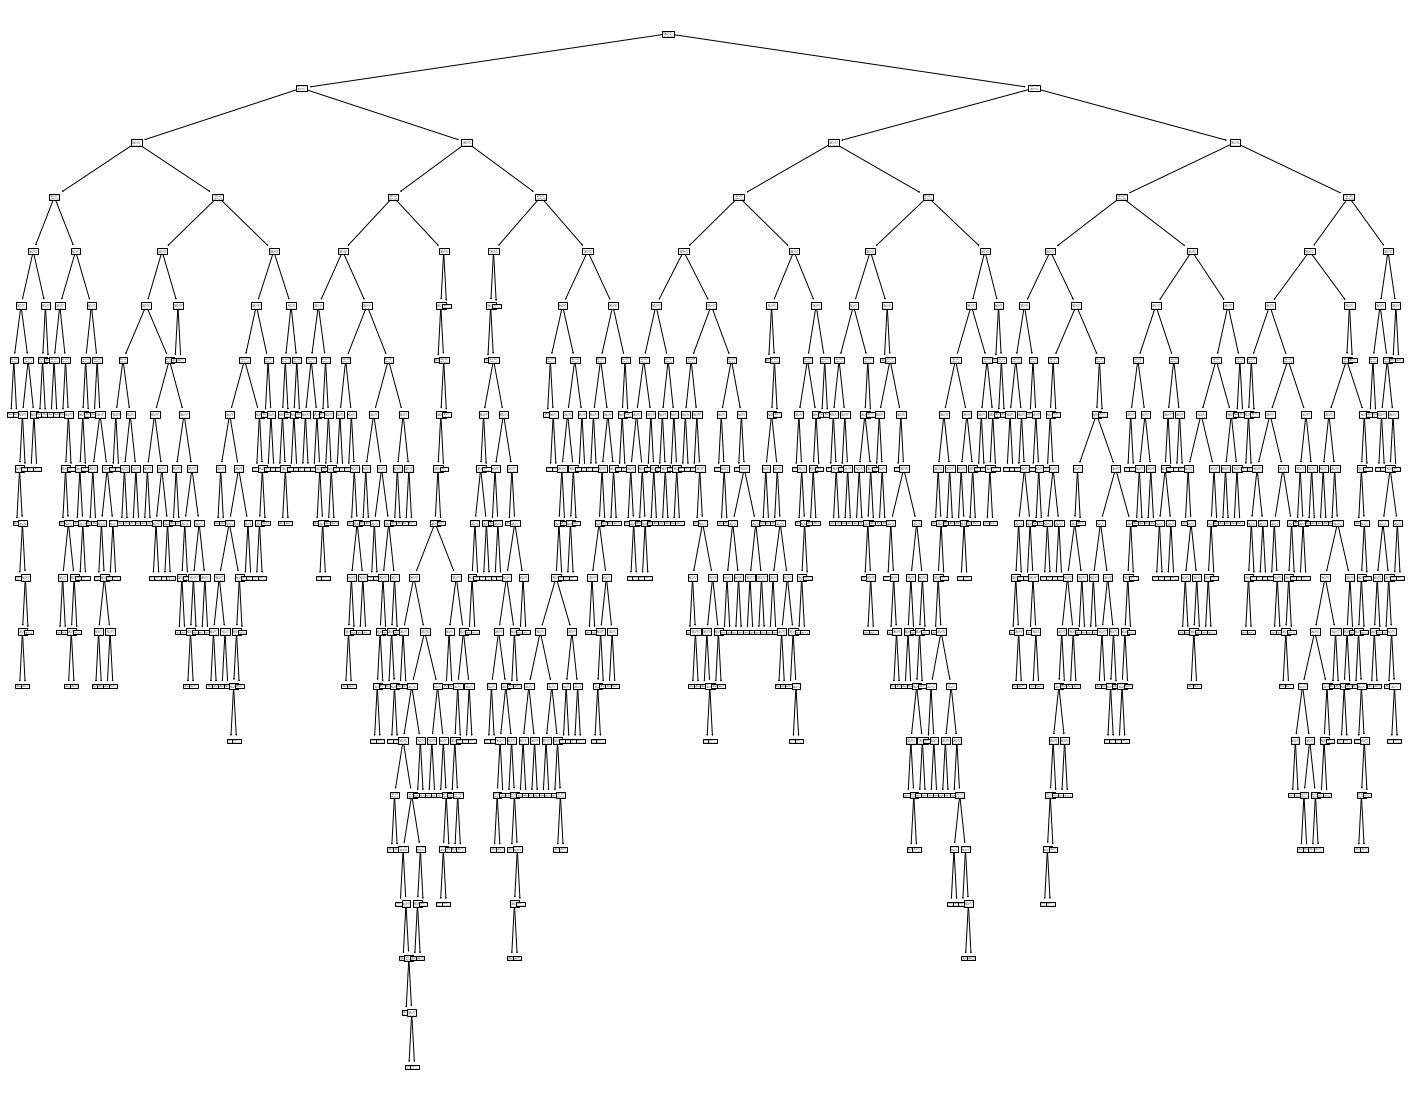

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt)

In [24]:
from sklearn.metrics import roc_curve, auc , accuracy_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(testy, preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7012263350380367

In [25]:
### Exploring improving performance

max_depths = np.arange(1, 33, 1)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(trainx, trainy)
   train_pred = dt.predict(trainx)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(trainy, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(testx)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(testy, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

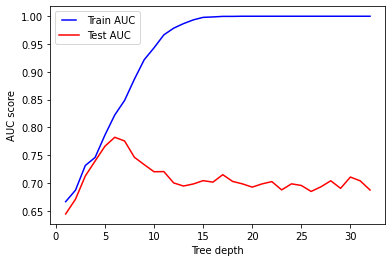

In [26]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [27]:
max(test_results)

0.7822372916995216

In [28]:
min_samples_splits = np.arange(0.1, 1.0, 0.1)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(trainx, trainy)
   train_pred = dt.predict(trainx)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(trainy, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(testx)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(testy, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

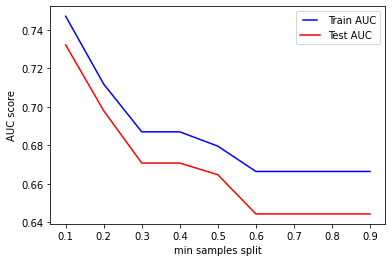

In [29]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [30]:
min_samples_leafs = np.arange(0.1, 0.5, 0.1)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(trainx, trainy)
   train_pred = dt.predict(trainx)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(trainy, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(testx)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(testy, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

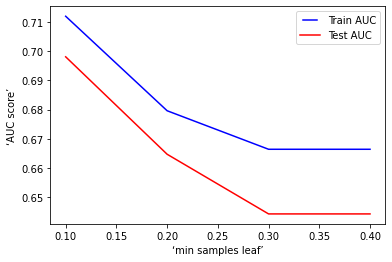

In [31]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('‘AUC score’')
plt.xlabel('‘min samples leaf’')
plt.show()

In [32]:
# Train again with "optimal parameters"

dt_opt = tree.DecisionTreeClassifier(max_depth=6)

In [33]:
dt_opt.fit(trainx,trainy)

DecisionTreeClassifier(max_depth=6)

In [34]:
opt_preds = dt_opt.predict(testx)

In [35]:
confusion_matrix(testy,opt_preds)

array([[279,  78],
       [ 82, 291]], dtype=int64)

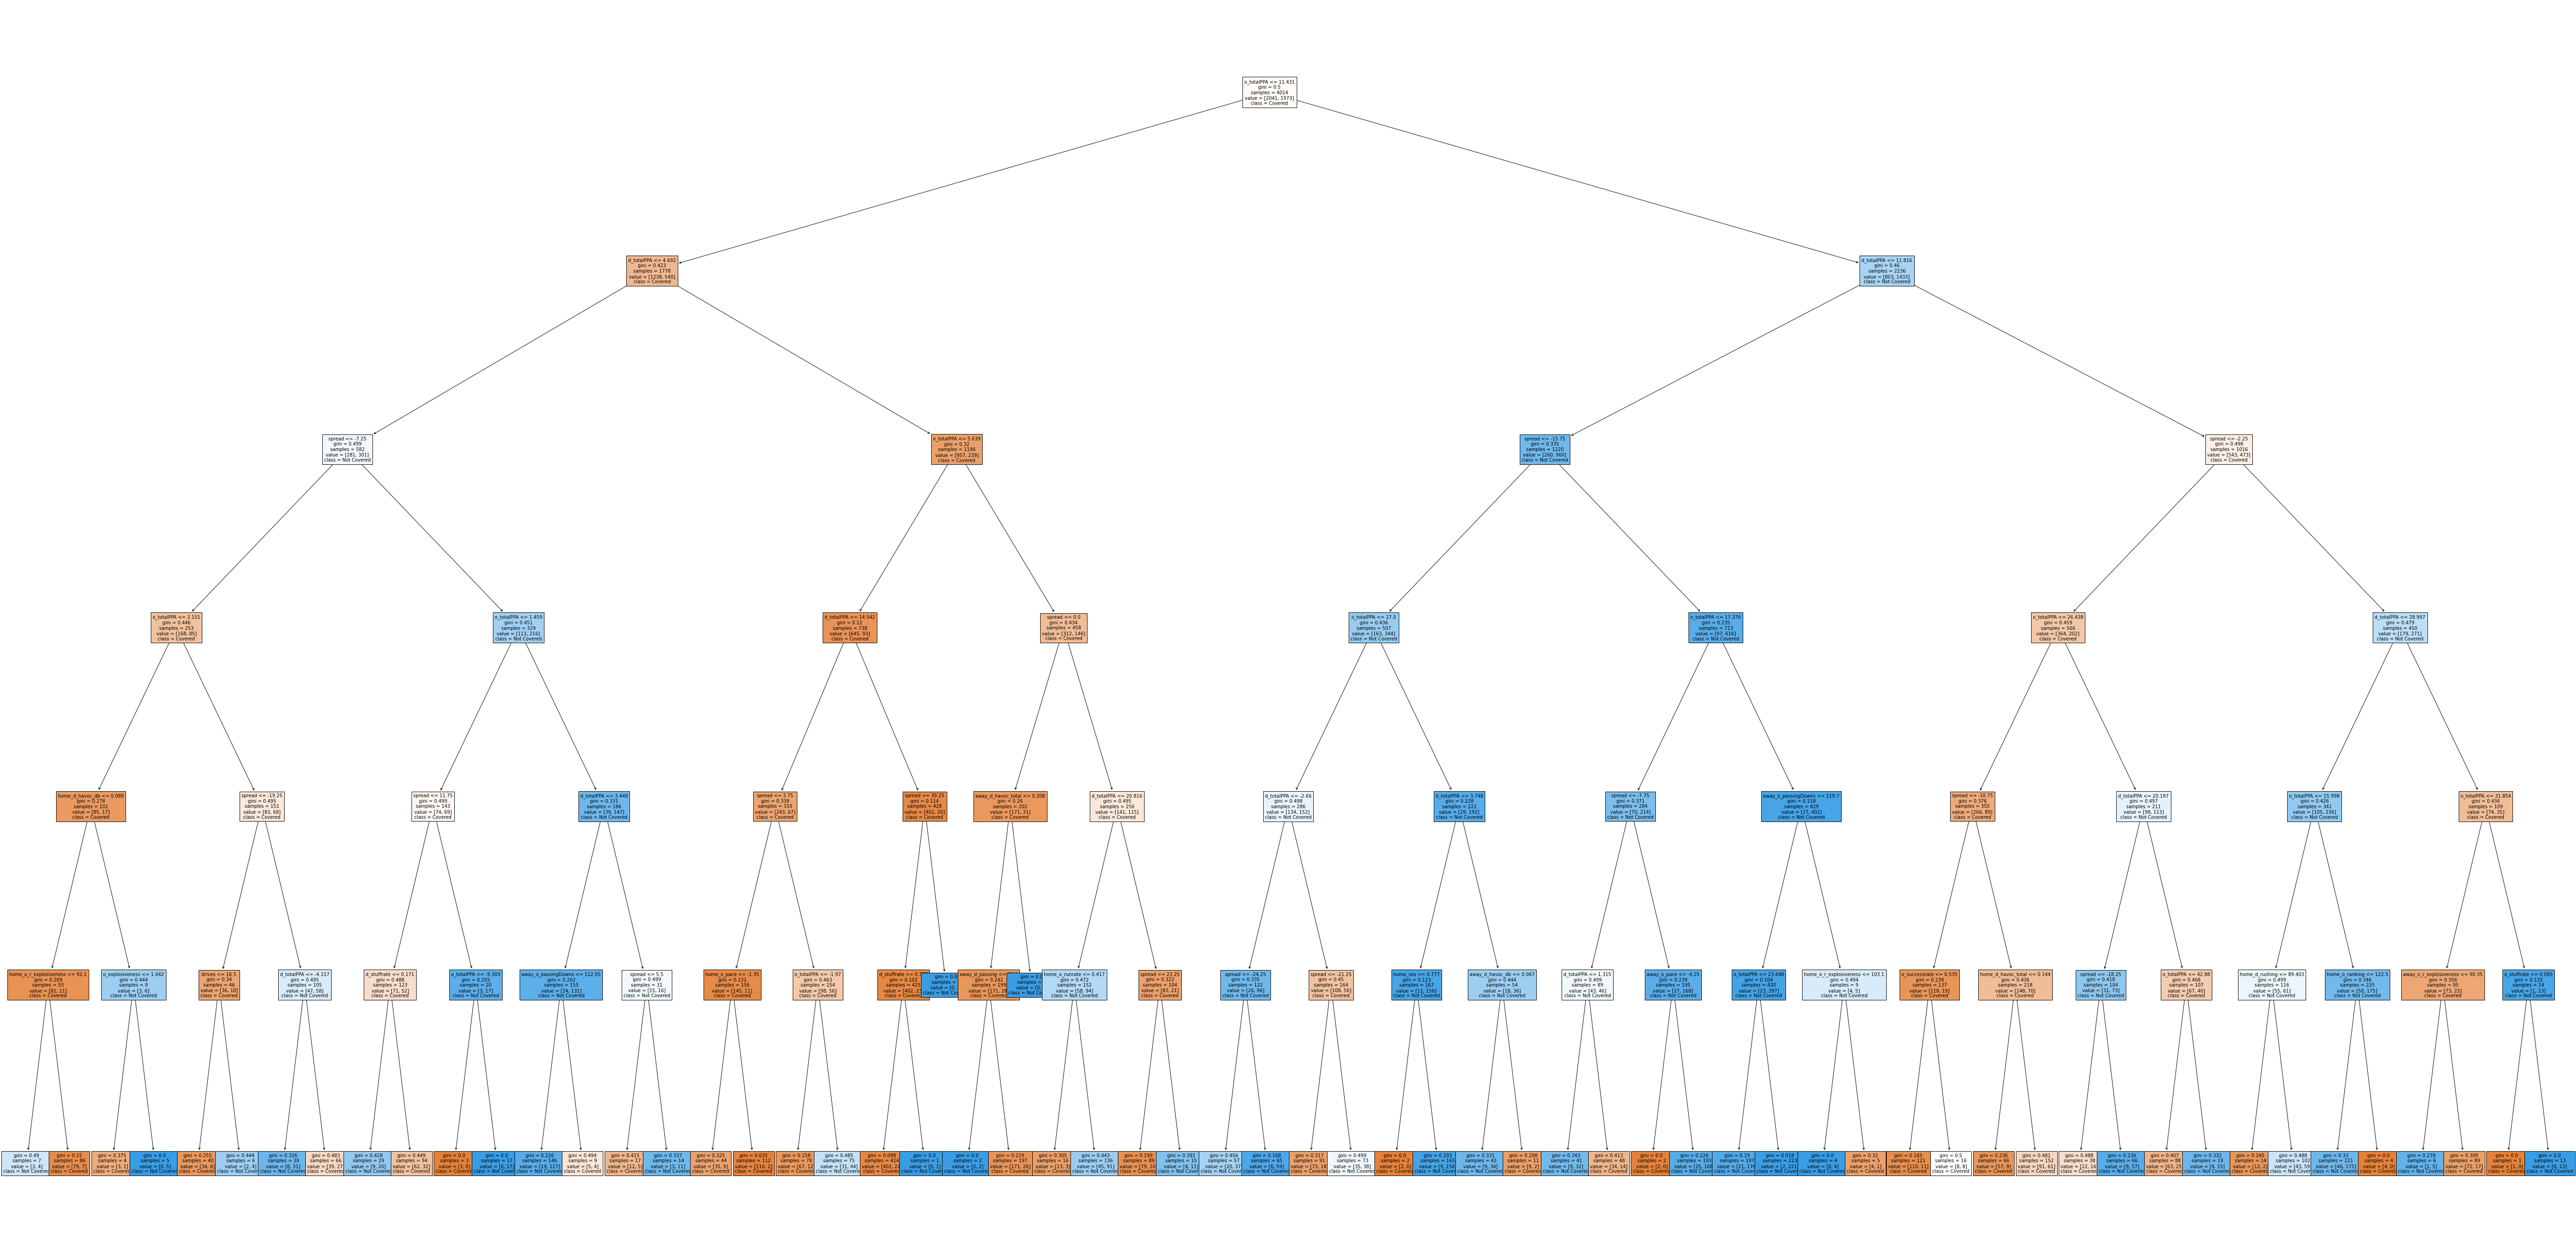

In [36]:
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(dt_opt,
                   feature_names = testx.columns,
                   class_names = ['Covered', 'Not Covered'],
                   filled = True,
                   fontsize=10)

In [37]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(testy, opt_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.780836731475432

In [38]:
# save model
with open('cfb_DT.pkl','wb') as f:
    pickle.dump(dt_opt,f)